##### Importing Libraries

In [101]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

##### Loading the dataset

In [102]:
df = pd.read_csv("audi.csv")

display(df.head())
print(df.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


(10668, 8)


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


Here, our dataset has 7 features and 1 target variable named "price". 
- Numerical features are year, mileage, mpg and engineSize
- Categorical features are model, transmission and fuelType

In [104]:
df.describe()

,year,price,mileage,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,188.300000,6.300000


In [105]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')

#### Analysis of Categorical Features

In [106]:
print(len(df['model'].unique()))
df["model"].value_counts()

26


 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 RS7       1
 A2        1
Name: model, dtype: int64

There are 26 types of models of cars in the audi dataset.

In [107]:
print(len(df['transmission'].unique()))
df["transmission"].value_counts()

3


Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64

There are 3 types of transmission of cars in the audi dataset.

In [108]:
print(len(df['fuelType'].unique()))
df["fuelType"].value_counts()

3


Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64

There are 3 types of fuelType of cars in the audi dataset.

#### Computing the correlation among variables

In [109]:
df_cor = df.corr()

display(df_cor)

,year,price,mileage,mpg,engineSize
year,1.000000,0.592581,-0.789667,-0.351281,-0.031582
price,0.592581,1.000000,-0.535357,-0.600334,0.591262
mileage,-0.789667,-0.535357,1.000000,0.395103,0.070710
mpg,-0.351281,-0.600334,0.395103,1.000000,-0.365621
engineSize,-0.031582,0.591262,0.070710,-0.365621,1.000000


Positive value of correlation means the increase of a variable because of the increase of another variable.
Negative value of correlation means the decrease of a variable because of the increase of another variable.

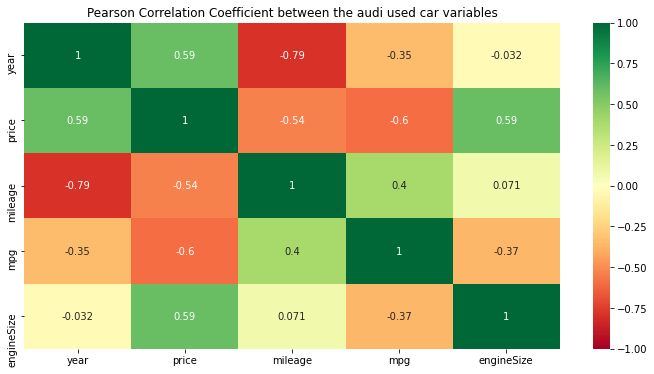

In [110]:
plt.figure(figsize=(12,6))
sns.heatmap(df_cor, annot=True, cmap="RdYlGn", vmax=1, vmin=-1)
plt.title("Pearson Correlation Coefficient between the audi used car variables")
plt.show()

##### Taking all features and target variable

In [111]:
features = ['year','mileage','mpg', 'engineSize']
target = ['price']

X = df[features]
y = df[target]

display(X)
print("Shape of X = ", X.shape)
print("Shape of y = ", y.shape)

,year,mileage,mpg,engineSize
0,2017,15735,55.4,1.4
1,2016,36203,64.2,2.0
2,2016,29946,55.4,1.4
3,2017,25952,67.3,2.0
4,2019,1998,49.6,1.0
...,...,...,...,...
10663,2020,4018,49.6,1.0
10664,2020,1978,49.6,1.0
10665,2020,609,49.6,1.0
10666,2017,8646,47.9,1.4


Shape of X =  (10668, 4)
Shape of y =  (10668, 1)


#### Train Test Split (80-20)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2, 
                                                    random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8534, 4) (2134, 4) (8534, 1) (2134, 1)


#### Applying Linear Regression model

In [113]:
model = LinearRegression()
model = model.fit(X_train, y_train)

In [114]:
coefficients = model.coef_
print(coefficients)

[[ 2.13753484e+03 -9.45546299e-02 -1.59965967e+02  1.05446050e+04]]


In [115]:
c = model.intercept_
print(c)

[-4298678.36912147]


In [116]:
X.columns

Index(['year', 'mileage', 'mpg', 'engineSize'], dtype='object')

##### Displaying features with their corrresponding coefficient values

In [117]:
coef_df = pd.DataFrame({"features": X.columns, 
                       "coefficients": np.squeeze(coefficients)})

display(coef_df)

,features,coefficients
0,year,2137.534837
1,mileage,-0.094555
2,mpg,-159.965967
3,engineSize,10544.605045


#### Predict the price of the car

In [118]:
y_pred = model.predict(X_test)
print(y_pred)

[[ 8404.61685932]
 [25242.08315391]
 [29769.42539605]
 ...
 [15223.19196191]
 [25409.82306727]
 [12240.88891797]]


In [119]:
print(y_test)

       price
10442   9990
2907   22382
7388   28990
3016   30777
7890   14950
...      ...
8606   31450
8977   12900
3673   16750
1034   21996
6867    9547

[2134 rows x 1 columns]


### Compute Key Performance Indicators using built-in function

In [120]:
MAE = mean_absolute_error(y_test, y_pred)
print("MAE = ", MAE)

MSE = mean_squared_error(y_test, y_pred, squared=True)
print("MSE = ", MSE)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", RMSE)

r2 = r2_score(y_test, y_pred)
print("r_squared = ", r2)

MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE = ",MAPE)

MAE =  3542.869720248138
MSE =  32708382.288602278
RMSE =  5719.124258888093
r_squared =  0.7835738058689382
MAPE =  0.17302472526531137


**Mean absolute error** represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

**Mean Squared Error** represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

**Root Mean Squared Error** is the square root of Mean Squared error. It measures the standard deviation of residuals.

**Coefficient of determination or R-squared** represents the proportion of the variance in the dependent variable. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.

**Mean Absolute Percentage Error** MAPE can be considered as a loss function to define the error termed by the model evaluation. Using MAPE, we can estimate the accuracy in terms of the differences in the actual v/s estimated values.MAE is the average magnitude of error produced by your model, the MAPE is how far the model's predictions are off from their corresponding outputs on average.

### Compute Key Performance Indicators from actual and predicted data

In [121]:
y_test

,price
10442,9990
2907,22382
7388,28990
3016,30777
7890,14950
...,...
8606,31450
8977,12900
3673,16750
1034,21996


In [122]:
y_pred

array([[ 8404.61685932],
       [25242.08315391],
       [29769.42539605],
       ...,
       [15223.19196191],
       [25409.82306727],
       [12240.88891797]])

In [123]:
y_pred_f = y_pred.flatten()
y_pred_f

array([ 8404.61685932, 25242.08315391, 29769.42539605, ...,
       15223.19196191, 25409.82306727, 12240.88891797])

In [124]:
y_test_np = y_test.to_numpy()
y_test_np

array([[ 9990],
       [22382],
       [28990],
       ...,
       [16750],
       [21996],
       [ 9547]], dtype=int64)

In [125]:
y_test_f = y_test_np.flatten()
y_test_f

array([ 9990, 22382, 28990, ..., 16750, 21996,  9547], dtype=int64)

In [126]:
df_pred_actual = pd.DataFrame({"actual":y_test_f,
                   "predicted": y_pred_f})
df_pred_actual["dif"] = df_pred_actual["actual"] - df_pred_actual["predicted"]
df_pred_actual["abs_error"] = np.abs(df_pred_actual["dif"])
df_pred_actual["squared_error"] = df_pred_actual["dif"]**2

df_pred_actual["actual_subtract_mean"] = df_pred_actual["actual"] - df_pred_actual["actual"].mean()
df_pred_actual["squared_actual_subtract_mean"] = df_pred_actual["actual_subtract_mean"]**2

display(df_pred_actual)


,actual,predicted,dif,abs_error,squared_error,actual_subtract_mean,squared_actual_subtract_mean
0,9990,8404.616859,1585.383141,1585.383141,2.513440e+06,-13202.334583,1.743016e+08
1,22382,25242.083154,-2860.083154,2860.083154,8.180076e+06,-810.334583,6.566421e+05
2,28990,29769.425396,-779.425396,779.425396,6.075039e+05,5797.665417,3.361292e+07
3,30777,27533.283872,3243.716128,3243.716128,1.052169e+07,7584.665417,5.752715e+07
4,14950,15051.857525,-101.857525,101.857525,1.037496e+04,-8242.334583,6.793608e+07
...,...,...,...,...,...,...,...
2129,31450,32477.676699,-1027.676699,1027.676699,1.056119e+06,8257.665417,6.818904e+07
2130,12900,18914.493013,-6014.493013,6014.493013,3.617413e+07,-10292.334583,1.059322e+08
2131,16750,15223.191962,1526.808038,1526.808038,2.331143e+06,-6442.334583,4.150367e+07
2132,21996,25409.823067,-3413.823067,3413.823067,1.165419e+07,-1196.334583,1.431216e+06


In [127]:
df_pred_actual["actual"].mean()

23192.33458294283

In [128]:
# mean absolute error: lower is better
MAE = df_pred_actual["abs_error"].mean()
print("MAE = ", MAE)


# mean squared error: lower is better
MSE = df_pred_actual["squared_error"].mean()
print("MSE = ", MSE)

# root mean squared error: lower is better
RMSE = np.round(np.sqrt(MSE), 2)
print("RMSE = ", RMSE)

# coefficient of determination == r_squared: greater is better. Max =1, min=-
r_squared = np.round(1- df_pred_actual["squared_error"].sum()/df_pred_actual["squared_actual_subtract_mean"].sum(), 2)
print("r_squared = ", r_squared)

# MAPE: Mean Absolute Percentage Error: lower is better
MAPE = np.round(np.mean(df_pred_actual["abs_error"]/df_pred_actual["actual"])*100, 2)
print("MAPE = ", MAPE)

MAE =  3542.869720248138
MSE =  32708382.288602278
RMSE =  5719.12
r_squared =  0.78
MAPE =  17.3


##### If we compare these results with the results calculated using built-in functions, they are identical